In [8]:
from safe_control_gym.envs.manipulators.manipulator import BaseManipulator
import numpy as np 
import random 
from time import sleep
from safe_control_gym.envs.benchmark_env import Cost, Task
from gym import spaces
from stable_baselines3 import PPO, DDPG, A2C

In [9]:
urdf_path = "../safe_control_gym/envs/manipulators/assets/franka_panda/panda.urdf"
controlled_variable = "torque"
target_space = "joint"

controlled_joint_indices = [6]
observed_link_indices = [7]
observed_link_state_keys = ["position"]


# orientation_goal = [0.603, 0.3687, -0.3697, 0.6026]
# position_goal = [0.03692, 0, 0.973]

goal = [-0.127, 0.0, 1.012] # for 1 joint 
# -0.03458691, -0.01447242,  1.118461
# position_goal = [0.0212 , -0.0288,  1.113] # 2joints

# goal = [0.0212, 1.113] #2D
# position_goal = [0.0868, -0.022,  1.014] # 2 joints
# position_goal = [0.0, 0, 1]

#TODO reuse this for future 
# goal = [{
#     "position": [None for i in range(13)]
# }]
# goal[0]["position"][observed_link_indices[0]] = position_goal

goal_type = "point"
connection = "gui"
# control_method = "classical"
control_method = "rl"
dimensions = 3
tolerance = 15 
task = "traj_tracking"
if dimensions == 2:
    position_goal = [0.0212, 1.113]
    
elif dimensions == 3:
    position_goal = [0.0212, 0, 1.113]
    
env = BaseManipulator(
    urdf_path,
    controlled_variable,
    control_method,
    target_space,
    tolerance=15,
    controlled_joint_indices = controlled_joint_indices,
    observed_link_indices = observed_link_indices, 
    observed_link_state_keys = observed_link_state_keys,
    goal = goal,
    goal_type = goal_type,
    cost = Cost.RL_REWARD,
    connection = connection,
    dimensions = dimensions,
    task = task 
    
)

error: Only one local in-process GUI/GUI_SERVER connection allowed. Use DIRECT connection mode or start a separate GUI physics server (ExampleBrowser, App_SharedMemoryPhysics_GUI, App_SharedMemoryPhysics_VR) and connect over SHARED_MEMORY, UDP or TCP instead.

In [3]:
joint_states=  env._pb_client.getJointState(env.robot,
                                            jointIndex=6,
                                )

joint_states

(0.0, 0.0, (0.0, 0.0, 0.0, 0.0, 0.0, 0.0), 0.0)

In [21]:
env.reset()
action_space = [0.2]
# action_space = [-400]

for i in range(50):
#     action_index = env.n_joints-2
    action_index = 6
    # action_list = np.zeros(env.n_joints)
    # action_list = [random.choice(action_space) for i in env.controlled_joint_indices]    
    # print(action_list)
    
    # TODO must keep torque bw 250 - 300 to avoid moving other joints 
    env._pb_client.setJointMotorControl2(env.robot, jointIndex=6,
                    controlMode= env.controlled_variable, force=250
            )
    env._pb_client.stepSimulation()
    joint_states=  env._pb_client.getJointState(env.robot,
                                            jointIndex=6,
                                )
    # action_list = [200]
    link_states =  env._pb_client.getLinkState(env.robot,
                                            linkIndex=7,
                                            computeLinkVelocity=True)
  
    print(f"link state: {[round(i,3) for i in link_states[1]]}")
    
    print(f"joint state: {round(joint_states[0], 3)}")
    # obs,reward, done,info = env.step(action_list)
    # if i%5== 0 :
    # print(action_list)
    # obs_position = [round(i,3) for i in obs[:3]]
    
    # print(f"obs: {obs_position}") # link position
    # print(f"reward: {reward}")
  #   print(f"angular velocity: {obs}") # velocity
    # print(f"joint state: {joint_states}") # link position
    # print(f"link state: {link_states}") # link position
    # print(f"observation: {}")
    # print(f"position : {link_states[]}")
    
    sleep(0.05)
    # input()

link state: [1.0, 0.0, 0.0, 0.0]
joint state: 0.004
link state: [1.0, -0.0, 0.002, 0.0]
joint state: 0.011
link state: [1.0, -0.0, 0.006, 0.0]
joint state: 0.023
link state: [1.0, -0.0, 0.011, 0.0]
joint state: 0.038
link state: [1.0, -0.0, 0.019, 0.0]
joint state: 0.057
link state: [1.0, -0.0, 0.028, 0.0]
joint state: 0.079
link state: [0.999, -0.0, 0.04, 0.0]
joint state: 0.106
link state: [0.999, -0.0, 0.053, 0.0]
joint state: 0.136
link state: [0.998, -0.0, 0.068, 0.0]
joint state: 0.17
link state: [0.996, -0.0, 0.085, 0.0]
joint state: 0.208
link state: [0.995, -0.0, 0.104, 0.0]
joint state: 0.249
link state: [0.992, -0.0, 0.124, 0.0]
joint state: 0.294
link state: [0.989, -0.0, 0.147, 0.0]
joint state: 0.343
link state: [0.985, -0.0, 0.171, 0.0]
joint state: 0.396
link state: [0.98, -0.0, 0.197, 0.0]
joint state: 0.453
link state: [0.975, -0.0, 0.224, 0.0]
joint state: 0.513
link state: [0.967, -0.0, 0.254, 0.0]
joint state: 0.577
link state: [0.959, -0.0, 0.284, 0.0]
joint state

In [ ]:
env.reset()

Exploring link states

In [ ]:
joint_states=  env._pb_client.getJointState(env.robot,
                                            jointIndex=6,
                                )
joint_states

In [ ]:
joint_states=  env._pb_client.getJointState(env.robot,
                                            jointIndex=7,
                                )

joint_states

In [ ]:
link_states =  env._pb_client.getLinkState(env.robot,
                                            linkIndex=7,
                                            computeLinkVelocity=True)


In [ ]:
link_states

In [ ]:
# only extract world positions
link_states_dict = {
    "position": link_states[4],
    "orientation": link_states[5],
    "linear_vel": link_states[6],
    "angular_vel": link_states[7]
}

In [ ]:
link_states_dict

## RL

In [ ]:
from gym import spaces 
# env.observation_space = spaces.Box(-np.inf, np.inf, (14,), dtype=np.float32)

# orientation use quaternion so 4 dim 

# action_space = [spaces.Discrete(1) for i in range(env.n_joints-1)]
# action_space.append(spaces.Box(-400, 400, shape=(1,), dtype=np.float32))

# env.action_space = spaces.Tuple(
#     action_space
# )

# dim dict
dim_dict = {
    "position":3 + 3,
    "orientation" : 4+4
}
env.action_space = spaces.Box(-4.5, 4.5, (len(env.controlled_joint_indices),), dtype=np.float32)

# TODO expand to multiple state keys 
env.observation_space = spaces.Box(-np.inf, np.inf, (dim_dict[observed_link_state_keys[0]], ), dtype=np.float32)

# env.observation_space = spaces.Dict({
#       'position': spaces.Box(-np.inf, np.inf, (env.n_joints, 3), dtype=np.float32),
#       'orientation': spaces.Box(-np.inf, np.inf, (env.n_joints, 4), dtype=np.float32),
#       'linear_vel': spaces.Box(-np.inf, np.inf, (env.n_joints, 3), dtype=np.float32),
#       'angular_vel': spaces.Box(-np.inf, np.inf, (env.n_joints, 3), dtype=np.float32),
#     })


In [ ]:
env._get_observation()

In [ ]:

env.reset()
ppo_model = PPO('MlpPolicy', env, verbose=1)

# use this to stop if too many timesteps cannot converge to done 
for i in range(10):
    ppo_model.learn(total_timesteps=10000)




In [ ]:

# env.reset()
ppo_model = PPO('MlpPolicy', env, verbose=1)

# use this to stop if too many timesteps cannot converge to done 
for i in range(10):
    ppo_model.learn(total_timesteps=10000)




In [ ]:
ppo_model.save("manipulator_100000")

In [ ]:
obs = env.reset()
for i in range(3000):
    action, _state = ppo_model.predict(obs, deterministic=False)
    # print(_state)
    obs, reward, done, info = env.step(action)
    # applied_action = env._action_mapping_torque(action)
    
    if i%5==0:
        print(f"Iteration:{i}")
        print(f"action: {action}")
        print(f"goal: {goal[0]['position'][7]}")
        print(f"state: {[round(ob,3) for ob in obs]}")
        print(f"reward: {reward}\n")
    
    if done: 
        print("done")
        break
    
    # sleep(0.05)

## Classical Control

In [1]:
from safe_control_gym.envs.manipulators.manipulator import BaseManipulator
import numpy as np 
import random 
from time import sleep
from safe_control_gym.envs.benchmark_env import Cost, Task
from gym import spaces
from stable_baselines3 import PPO, DDPG, A2C
import os 
home = "/Users/nicholasprayogo/code/rm-sc"
# cwd = os.path.join(home, "src/interpretable_ts_clustering/")
os.chdir(home)


from functools import partial
from safe_control_gym.utils.configuration import ConfigFactory

fac = ConfigFactory()
config = fac.merge()
# env_func = partial(make, config.task, output_dir=config.output_dir, **config.task_config)

pybullet build time: Mar 29 2022 22:56:14
/Users/nicholasprayogo/code/rm-sc/safe_control_gym/utils/configuration.py:72: UserWarning: No agent/task config given.
  warnings.warn("No agent/task config given.")


In [2]:
import yaml

config.algo = "ilqr"
config.task = "manipulator"
# controller_yaml_path = "safe_control_gym/controllers/lqr/lqr.yaml"
controller_yaml_path = "safe_control_gym/controllers/lqr/ilqr.yaml"
env_yaml_path = "safe_control_gym/envs/manipulators/manipulator.yaml"

with open(controller_yaml_path, "r") as yamlfile:
    config.algo_config = yaml.load(yamlfile, Loader=yaml.FullLoader)
    
with open(env_yaml_path, "r") as yamlfile:
    config.task_config = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [11]:
config.algo_config

{'discrete_dynamics': 1,
 'deque_size': 10,
 'eval_batch_size': 1,
 'q_lqr': [1],
 'r_lqr': [0.1],
 'max_iterations': 15,
 'lamb_factor': 10,
 'lamb_max': 1000,
 'epsilon': 0.001,
 'verbose': False,
 'plot_traj': False,
 'save_plot': True,
 'plot_dir': './results/ilqr_baseline/',
 'save_data': True,
 'data_dir': './results/ilqr_baseline/',
 'task': 'stabilization',
 'episode_len_sec': 5,
 'task_info': {'stabilization_goal': [0, 1],
  'trajectory_type': 'circle',
  'num_cycles': 1,
  'trajectory_plane': 'zx',
  'trajectory_position_offset': [0.5, 0],
  'trajectory_scale': -0.5},
 'random_init': False,
 'ctrl_freq': 100,
 'pyb_freq': 1000}

In [12]:
config.task_config

{'urdf_path': './safe_control_gym/envs/manipulators/assets/franka_panda/panda.urdf',
 'controlled_variable': 'torque',
 'goal_type': 'point',
 'connection': 'direct',
 'control_method': 'classical',
 'dimensions': 2,
 'target_space': 'joint',
 'goal': [2.5, 0],
 'controlled_joint_indices': [6],
 'observed_link_indices': [7],
 'observed_link_state_keys': ['position'],
 'tolerance': 15,
 'task': 'stabilization',
 'disturbances': None,
 'adversary_disturbance': None,
 'adversary_disturbance_offset': 0.0,
 'adversary_disturbance_scale': 0.01,
 'constraints': None,
 'done_on_violation': False,
 'use_constraint_penalty': False,
 'constraint_penalty': -1}

In [3]:
from safe_control_gym.utils.registration import make
env_func = partial(make, config.task, output_dir=config.output_dir, **config.task_config)
control_agent = make(config.algo,
                         env_func,
                         training=True,
                         checkpoint_path=os.path.join(config.output_dir, "model_latest_manippulator.pt"),
                         output_dir=config.output_dir,
                         device=config.device,
                         seed=config.seed,
                         **config.algo_config)

In [4]:
x = [0.5, 0.2]
# control_agent.k = 0 
# control_agent.select_action(x, 0)

In [5]:
control_agent.task

<Task.STABILIZATION: 'stabilization'>

argv[0]=
@1=vertcat(theta, theta_dot), mac(mac((0.5*(@1-Xr)'),Q,zeros(1x2)),(@1-Xr),0)
close connection
argv[0]=
@1=vertcat(theta, theta_dot), mac(mac((0.5*(@1-Xr)'),Q,zeros(1x2)),(@1-Xr),0)
initial state: 0.00 0.00
final state: 3.10 0.53
iteration 0 reward -1712.2477
--------------------------
Maximum episode length: 267 steps!
(267, 1) (267, 1, 2)
Save iteration gains. Best iteration 0
UPDATE POLICY
266 267 (268, 2) (267, 1) (267, 1, 2)
265 267 (268, 2) (267, 1) (267, 1, 2)
264 267 (268, 2) (267, 1) (267, 1, 2)
263 267 (268, 2) (267, 1) (267, 1, 2)
262 267 (268, 2) (267, 1) (267, 1, 2)
261 267 (268, 2) (267, 1) (267, 1, 2)
260 267 (268, 2) (267, 1) (267, 1, 2)
259 267 (268, 2) (267, 1) (267, 1, 2)
258 267 (268, 2) (267, 1) (267, 1, 2)
257 267 (268, 2) (267, 1) (267, 1, 2)
256 267 (268, 2) (267, 1) (267, 1, 2)
255 267 (268, 2) (267, 1) (267, 1, 2)
254 267 (268, 2) (267, 1) (267, 1, 2)
253 267 (268, 2) (267, 1) (267, 1, 2)
252 267 (268, 2) (267, 1) (267, 1, 2)
251 267 (268, 2) (267, 1)

{'ep_returns': array([-1058.95431117]),
 'ep_lengths': array([173]),
 'ep_fulldata': {'run0_data': {'ite0_state': array([[0.        , 0.        ],
          [0.01542737, 3.70256841],
          [0.03914406, 5.69200537],
          [0.06724064, 6.74318074],
          [0.09757934, 7.28128682],
          [0.12898811, 7.53810484],
          [0.16083119, 7.64233981],
          [0.19276105, 7.66316701],
          [0.22458915, 7.63874277],
          [0.25621386, 7.58992998],
          [0.28758116, 7.52815229],
          [0.31866296, 7.4596332 ],
          [0.34944505, 7.38769994],
          [0.37992174, 7.3144061 ],
          [0.41009122, 7.24067447],
          [0.43995374, 7.16700669],
          [0.46951106, 7.09375506],
          [0.49876543, 7.02104996],
          [0.52771951, 6.94897838],
          [0.55637611, 6.87758481],
          [0.58473815, 6.8068902 ],
          [0.61280858, 6.73690268],
          [0.64059035, 6.66762336],
          [0.66808639, 6.59904959],
          [0.69529962, 6.

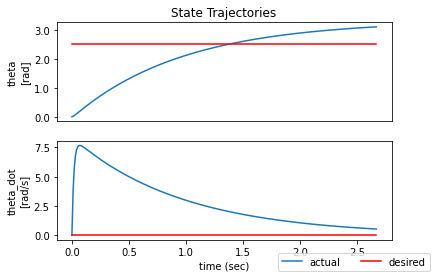

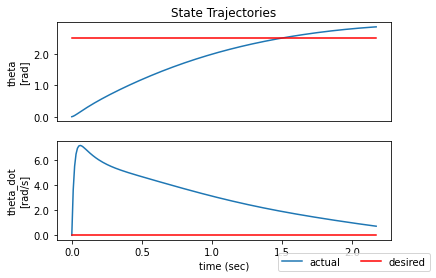

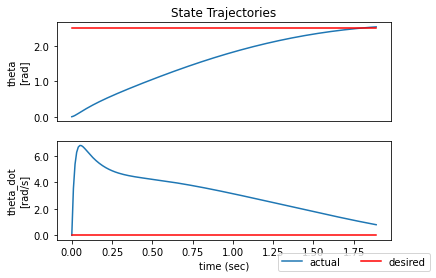

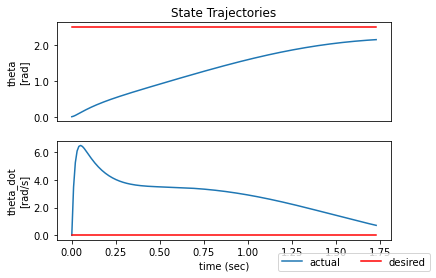

In [6]:
control_agent.init_env()
control_agent.run()

close connection
argv[0]=
@1=vertcat(theta, theta_dot), mac(mac((0.5*(@1-Xr)'),Q,zeros(1x2)),(@1-Xr),0)
initial state: 0.00 0.00
final state: 3.10 0.53
iteration 0 reward -1712.2477
--------------------------
Maximum episode length: 267 steps!
(267, 1) (267, 1, 2)
Save iteration gains. Best iteration 0
UPDATE POLICY
266 267 (268, 2) (267, 1) (267, 1, 2)
265 267 (268, 2) (267, 1) (267, 1, 2)
264 267 (268, 2) (267, 1) (267, 1, 2)
263 267 (268, 2) (267, 1) (267, 1, 2)
262 267 (268, 2) (267, 1) (267, 1, 2)
261 267 (268, 2) (267, 1) (267, 1, 2)
260 267 (268, 2) (267, 1) (267, 1, 2)
259 267 (268, 2) (267, 1) (267, 1, 2)
258 267 (268, 2) (267, 1) (267, 1, 2)
257 267 (268, 2) (267, 1) (267, 1, 2)
256 267 (268, 2) (267, 1) (267, 1, 2)
255 267 (268, 2) (267, 1) (267, 1, 2)
254 267 (268, 2) (267, 1) (267, 1, 2)
253 267 (268, 2) (267, 1) (267, 1, 2)
252 267 (268, 2) (267, 1) (267, 1, 2)
251 267 (268, 2) (267, 1) (267, 1, 2)
250 267 (268, 2) (267, 1) (267, 1, 2)
249 267 (268, 2) (267, 1) (267, 1, 2

{'ep_returns': array([-1058.95431117]),
 'ep_lengths': array([173]),
 'ep_fulldata': {'run0_data': {'ite0_state': array([[0.        , 0.        ],
          [0.01542737, 3.70256841],
          [0.03914406, 5.69200537],
          [0.06724064, 6.74318074],
          [0.09757934, 7.28128682],
          [0.12898811, 7.53810484],
          [0.16083119, 7.64233981],
          [0.19276105, 7.66316701],
          [0.22458915, 7.63874277],
          [0.25621386, 7.58992998],
          [0.28758116, 7.52815229],
          [0.31866296, 7.4596332 ],
          [0.34944505, 7.38769994],
          [0.37992174, 7.3144061 ],
          [0.41009122, 7.24067447],
          [0.43995374, 7.16700669],
          [0.46951106, 7.09375506],
          [0.49876543, 7.02104996],
          [0.52771951, 6.94897838],
          [0.55637611, 6.87758481],
          [0.58473815, 6.8068902 ],
          [0.61280858, 6.73690268],
          [0.64059035, 6.66762336],
          [0.66808639, 6.59904959],
          [0.69529962, 6.

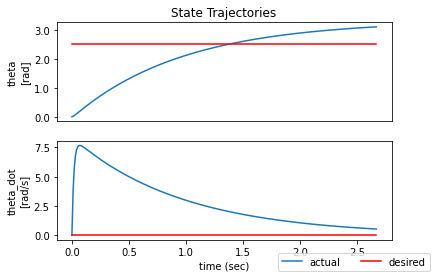

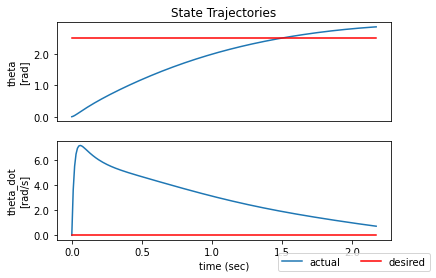

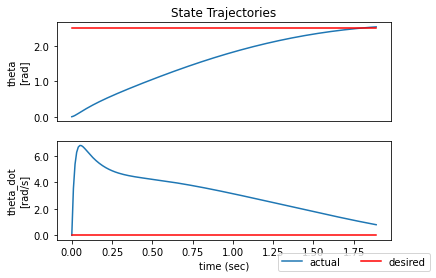

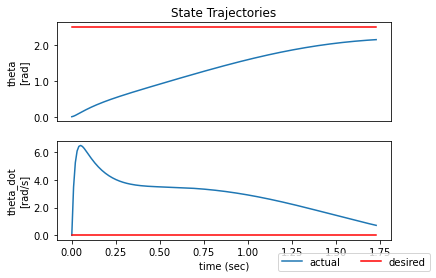

In [10]:
control_agent.run()

initial state: 2.69 0.79
final state: 3.10 0.53
iteration 0 reward -1750.3067
--------------------------
Maximum episode length: 104 steps!
(104, 1) (104, 1, 2)
Save iteration gains. Best iteration 0
UPDATE POLICY
103 104 (105, 2) (104, 1) (104, 1, 2)
102 104 (105, 2) (104, 1) (104, 1, 2)
101 104 (105, 2) (104, 1) (104, 1, 2)
100 104 (105, 2) (104, 1) (104, 1, 2)
99 104 (105, 2) (104, 1) (104, 1, 2)
98 104 (105, 2) (104, 1) (104, 1, 2)
97 104 (105, 2) (104, 1) (104, 1, 2)
96 104 (105, 2) (104, 1) (104, 1, 2)
95 104 (105, 2) (104, 1) (104, 1, 2)
94 104 (105, 2) (104, 1) (104, 1, 2)
93 104 (105, 2) (104, 1) (104, 1, 2)
92 104 (105, 2) (104, 1) (104, 1, 2)
91 104 (105, 2) (104, 1) (104, 1, 2)
90 104 (105, 2) (104, 1) (104, 1, 2)
89 104 (105, 2) (104, 1) (104, 1, 2)
88 104 (105, 2) (104, 1) (104, 1, 2)
87 104 (105, 2) (104, 1) (104, 1, 2)
86 104 (105, 2) (104, 1) (104, 1, 2)
85 104 (105, 2) (104, 1) (104, 1, 2)
84 104 (105, 2) (104, 1) (104, 1, 2)
83 104 (105, 2) (104, 1) (104, 1, 2)
82 10

{'ite_returns': array([-1750.30669622]),
 'ite_lengths': array([279]),
 'ite_data': {'ite0_state': array([[2.693596  , 0.78697523],
         [2.69825861, 1.11902643],
         [2.70364274, 1.29219078],
         [2.70939061, 1.37948943],
         [2.71531143, 1.42099518],
         [2.72129884, 1.43697897],
         [2.72729483, 1.4390388 ],
         [2.73326746, 1.43342925],
         [2.73919962, 1.42371991],
         [2.74508225, 1.41182976],
         [2.75091062, 1.39881068],
         [2.75668245, 1.38523906],
         [2.76239675, 1.37143046],
         [2.76805324, 1.35755735],
         [2.77365204, 1.34371366],
         [2.7791935 , 1.32995028],
         [2.78467806, 1.31629445],
         [2.79010623, 1.30276048],
         [2.79547855, 1.28935558],
         [2.80079556, 1.27608305],
         [2.80605783, 1.26294408],
         [2.8112659 , 1.24993868],
         [2.81642035, 1.23706626],
         [2.82152171, 1.22432586],
         [2.82657052, 1.21171635],
         [2.83156734, 1.1992

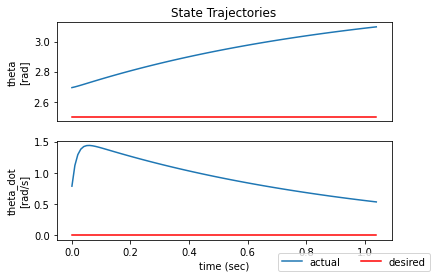

In [9]:
control_agent.run_ilqr()

In [ ]:
from safe_control_gym.utils.registration import register

register(id="manipulator",
         entry_point="safe_control_gym.envs.manipulators.manipulator:BaseManipulator",
         config_entry_point="safe_control_gym.envs.manipulators:manipulator.yaml")


Exception: Cannot re-register id: manipulator

In [7]:
from safe_control_gym.controllers.lqr.lqr import LQR 

LQR 

safe_control_gym.controllers.lqr.lqr.LQR

In [8]:
!python3 experiments.py

zsh: Can't add module parameter `commands': parameter already exists
python3: can't open file 'experiments.py': [Errno 2] No such file or directory


In [ ]:
import casadi as cs

g = 9.8
dt = 0.005 
mc = 0.5
ma = 0.5
# TODO express in terms of actual length (distance b.w 2 joints)
l = 1
I = 0 # moment of inertia from gears and motors

# must match dimension of X_GOAL and U_GOAL
nx = 2
nu = 1 

# x = cs.MX.sym('x')

x_x = cs.MX.sym('x_x')
# x_y = cs.MX.sym('x_y')
x_z = cs.MX.sym('x_z')
theta = cs.MX.sym('theta')
U = cs.MX.sym('U') # torque
theta_dot_dot = cs.MX.sym("tdotdot")
Theta_dot_dot = cs.vertcat(theta_dot_dot, (U-(mc/2+ma) * g * l * cs.sin(theta)) / ((mc/3 + ma)* l**2 + I))
# Theta_dot_dot = cs.MX.sym("ttt")
# not sure
# X = cs.vertcat(theta)
X = cs.vertcat(theta)
Y = cs.vertcat(theta)

Q = cs.MX.sym('Q', nx, nx)
R = cs.MX.sym('R', nu, nu)

Xr = cs.MX.sym('Xr', nx, 1)
Ur = cs.MX.sym('Ur', nu, 1)

# convert angular to cartesian position 
x_x = l * cs.cos(theta)
x_z = l * cs.sin(theta) 

X_array = cs.vertcat(x_x, x_z)

cost_func = 0.5 * (X_array - Xr).T @ Q @ (X_array - Xr) + 0.5 * (U - Ur).T @ R @ (U - Ur)

dynamics = {"dyn_eqn": Theta_dot_dot, "obs_eqn": Y, "vars": {"X": X, "U": U}}
cost = {"cost_func": cost_func, "vars": {"X": X, "U": U, "Xr": Xr, "Ur": Ur, "Q": Q, "R": R}}
            

In [ ]:
fc_func = cs.Function('fc', [X, U], [Theta_dot_dot], ['x', 'u'], ['f'])

In [ ]:
from safe_control_gym.math_and_models.symbolic_systems import SymbolicModel
symbolic = SymbolicModel(dynamics=dynamics, cost=cost, dt=dt)